# DESI DR1 BHBs

https://data.desi.lbl.gov/doc/releases/dr1/vac/mws-bhb/

Do a very simple reprocessing of the data into internal formats

In [33]:
from astropy.io import fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from astropy.coordinates import SkyCoord
import astropy.units as u


In [34]:
# Open a FITS file
#hdul = fits.open('../data/observations/DESI_DR1/MWS_BHB.fits')
hdul = fits.open("https://data.desi.lbl.gov/public/dr1/vac/dr1/mws-bhb/v1.0/MWS_BHB.fits",use_fsspec=True)
# Print the structure of the FITS file
hdul.info()

Filename: <class 'fsspec.implementations.http.HTTPFile'>
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  RVTAB         1 BinTableHDU     92   6327R x 37C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, K, 2A, D, D, K, E, E, E, L, D, 6A, K, 7A, 6A, L]   
  2  FIBERMAP      1 BinTableHDU    224   6327R x 85C   [K, J, D, D, E, E, E, K, B, 3A, D, J, I, 8A, J, J, 4A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, K, 2A, E, E, E, E, 1A, K, K, K, K, K, K, D, D, I, E, I, I, E, E, E, E, D, E, D, E, E, K, K, K, K, K, K, K, K, K, K, K, K, K, E, E, E, D, D]   
  3  GAIA          1 BinTableHDU    324   6327R x 153C   [K, 28A, K, K, D, D, E, D, E, D, E, E, E, D, E, D, E, E, E, E, E, E, E, E, E, E, E, I, I, I, I, E, E, E, E, I, L, E, E, E, E, E, E, E, E, I, I, E, I, I, I, E, E, I, I, E, E, E, E, E, E, E, E, E, L, I, D, E, E, E, I, D, E, E, E, I, D, E, E, E, E, I, I, I, I, I, E, E, E, E, E, I,

In [71]:
hdul[1].columns;hdul[2].columns;hdul[3].columns

ColDefs(
    name = 'SOLUTION_ID'; format = 'K'
    name = 'DESIGNATION'; format = '28A'
    name = 'SOURCE_ID'; format = 'K'
    name = 'RANDOM_INDEX'; format = 'K'
    name = 'REF_EPOCH'; format = 'D'; unit = 'yr'
    name = 'RA'; format = 'D'; unit = 'deg'
    name = 'RA_ERROR'; format = 'E'
    name = 'DEC'; format = 'D'; unit = 'deg'
    name = 'DEC_ERROR'; format = 'E'
    name = 'PARALLAX'; format = 'D'; unit = 'mas'
    name = 'PARALLAX_ERROR'; format = 'E'
    name = 'PARALLAX_OVER_ERROR'; format = 'E'
    name = 'PM'; format = 'E'
    name = 'PMRA'; format = 'D'; unit = 'mas  yr^-1'
    name = 'PMRA_ERROR'; format = 'E'
    name = 'PMDEC'; format = 'D'; unit = 'mas  yr^-1'
    name = 'PMDEC_ERROR'; format = 'E'
    name = 'RA_DEC_CORR'; format = 'E'
    name = 'RA_PARALLAX_CORR'; format = 'E'
    name = 'RA_PMRA_CORR'; format = 'E'
    name = 'RA_PMDEC_CORR'; format = 'E'
    name = 'DEC_PARALLAX_CORR'; format = 'E'
    name = 'DEC_PMRA_CORR'; format = 'E'
    name = 'DEC_PMD

In [136]:
main_sel = np.array(hdul[1].data['PRIMARY']) #& (np.array(hdul[1].data['RVS_WARN']) == 0) & (np.array(hdul[1].data['RR_SPECTYPE'])== 'STAR')

In [52]:
main_sel = (np.array(hdul[2].data['DIST'])>50) & np.array(hdul[1].data['PRIMARY']) #& (np.array(hdul[1].data['RVS_WARN']) == 0) & (np.array(hdul[1].data['RR_SPECTYPE'])== 'STAR')

In [132]:
main_sel = (np.array(hdul[1].data['RR_SPECTYPE'])== 'STAR')

In [137]:
np.nansum(main_sel),main_sel.size

(5441, 6327)

Text(0, 0.5, 'logg')

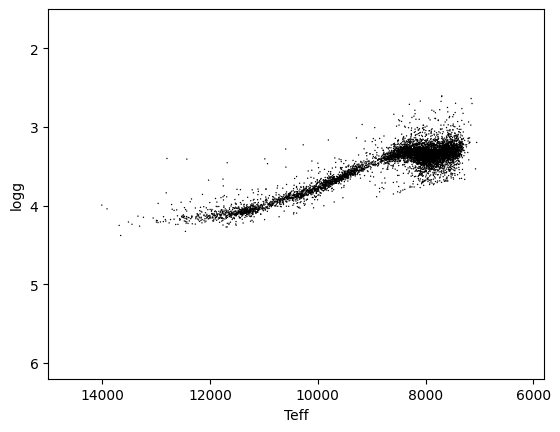

In [138]:
plt.scatter(hdul[1].data['TEFF'], hdul[1].data['LOGG'], edgecolor='none', facecolor='black', s=1)
#plt.scatter(hdul[1].data['TEFF'], hdul[1].data['FEH'], edgecolor='none', facecolor='black', s=1)

# should compare directly to SDSS as well
plt.axis([15000,5800,6.2,1.5])
plt.xlabel('Teff')
plt.ylabel('logg')

# looks good! like Figure 1 from Bystrom et al. (2025)

In [139]:

# g-r is then
#gr = hdul[2]['FLUX_G'] - hdul[2]['FLUX_R']
#plt.scatter(hdul[2].data['ABS_MAG_G'], hdul[2].data['DIST'], edgecolor='none', facecolor='black', s=1)

# this has some weird substructure in it
#plt.scatter(hdul[1].data['TEFF'], hdul[2].data['DIST'], edgecolor='none', facecolor='black', s=1)

In [140]:

# Extract the necessary data from the FITS file
ra = hdul[3].data['RA'] * u.deg  # Right Ascension
dec = hdul[3].data['DEC'] * u.deg  # Declination
distance = hdul[2].data['DIST'] * u.kpc  # Distance in kpc

# Extract proper motion and radial velocity data
pm_ra = hdul[3].data['PMRA'] * u.mas / u.yr  # Proper motion in RA
pm_dec = hdul[3].data['PMDEC'] * u.mas / u.yr  # Proper motion in DEC
radial_velocity = hdul[1].data['VRAD'] * u.km / u.s  # Radial velocity

# Update the SkyCoord object with velocity information
coords = SkyCoord(ra=ra, dec=dec, distance=distance, pm_ra_cosdec=pm_ra, pm_dec=pm_dec, radial_velocity=radial_velocity, frame='icrs')

# Convert to Cartesian coordinates with velocity
cartesian_coords = coords.cartesian
cartesian_velocity = coords.velocity


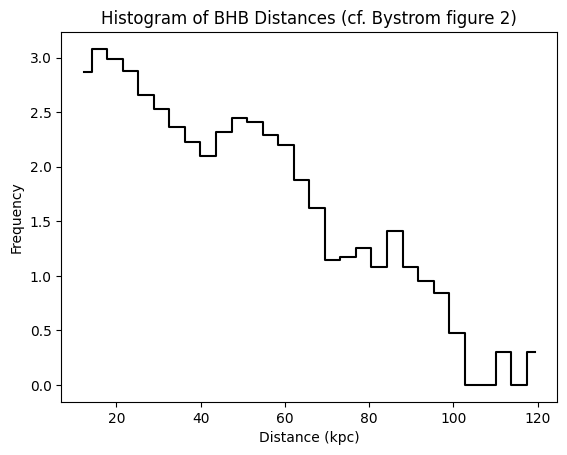

In [141]:
#plt.hist(distance.value, bins=50, color='blue', edgecolor='black')
# Calculate histogram values
hist_values, bin_edges = np.histogram(distance.value, bins=30)

# Plot the histogram manually
plt.plot(bin_edges[1:], np.log10(hist_values), color='black', drawstyle='steps-mid')
plt.xlabel('Distance (kpc)')
plt.ylabel('Frequency')
plt.title('Histogram of BHB Distances (cf. Bystrom figure 2)')
plt.show()



Text(0, 0.5, 'Ly (kpc km/s)')

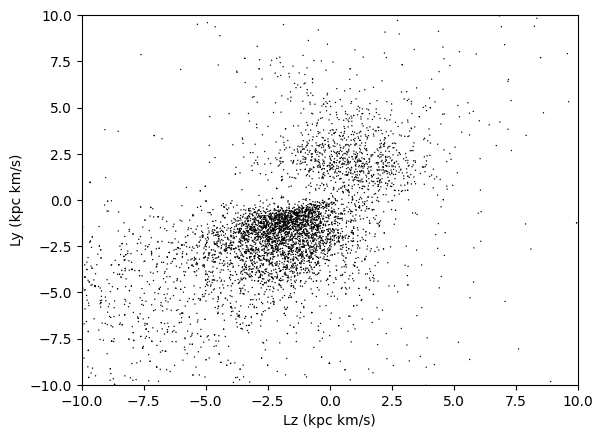

In [142]:
# compute the angular momenta
Lx = (cartesian_coords.y * cartesian_velocity.d_z - cartesian_coords.z * cartesian_velocity.d_y)
Ly = (cartesian_coords.z * cartesian_velocity.d_x - cartesian_coords.x * cartesian_velocity.d_z)
Lz = (cartesian_coords.x * cartesian_velocity.d_y - cartesian_coords.y * cartesian_velocity.d_x)

plt.scatter(Lz/1000,Ly/1000, edgecolor='none', facecolor='black', s=1)
plt.axis([-10,10,-10,10])
plt.xlabel('Lz (kpc km/s)')
plt.ylabel('Ly (kpc km/s)')

Text(0, 0.5, 'b')

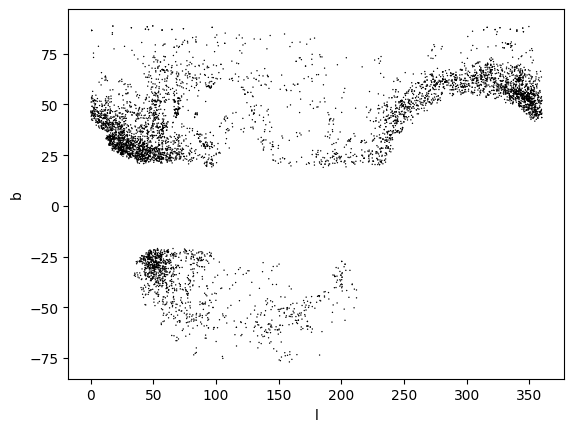

In [143]:
plt.scatter(hdul[3].data['L'], hdul[3].data['B'], edgecolor='none', facecolor='black', s=1)
plt.xlabel('l')
plt.ylabel('b')

Text(0, 0.5, 'radial velocity (heliocentric)')

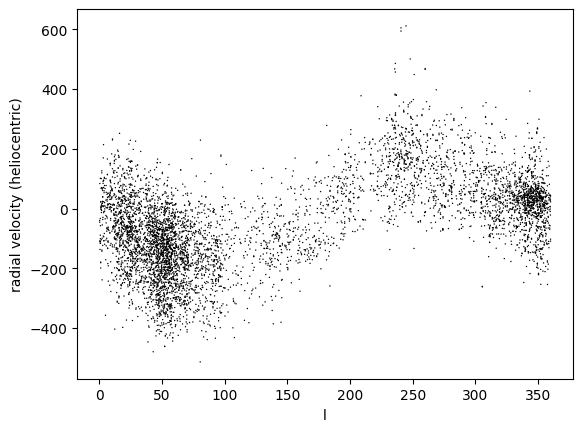

In [144]:
plt.scatter(hdul[3].data['L'], hdul[1].data['VRAD'], edgecolor='none', facecolor='black', s=1)
plt.xlabel('l')
plt.ylabel('radial velocity (heliocentric)')

In [145]:
#cats = ['x', 'y', 'z', 'vx', 'vy', 'vz', 'l','b','d','vlos','mul','mub','d_err','vlos_err','mul_err','mub_err','pm_corr']


In [160]:
# now let's make a pandas dataframe with all the stuff we want
# and save to a simple csv format

distance_error_rate = 0.1 # assume 10% distance error

DF = pd.DataFrame({'x':np.array(cartesian_coords.x)[main_sel], 'y':np.array(cartesian_coords.y)[main_sel], 'z':np.array(cartesian_coords.z)[main_sel], \
                   'vx':np.array(cartesian_velocity.d_x)[main_sel], 'vy':np.array(cartesian_velocity.d_y)[main_sel], 'vz':np.array(cartesian_velocity.d_z)[main_sel],
                   'l':np.array(hdul[3].data['L']).astype(float)[main_sel],'b':np.array(hdul[3].data['B']).astype(float)[main_sel],'d':np.array(hdul[2].data['DIST']).astype(float)[main_sel],'vlos':np.array(hdul[1].data['VRAD']).astype(float)[main_sel],\
                   'mul':np.array(hdul[3].data['PMRA']).astype(float)[main_sel],'mub':np.array(hdul[3].data['PMDEC']).astype(float)[main_sel],\
                   'd_err':distance_error_rate*np.array(hdul[2].data['DIST']).astype(float)[main_sel],'vlos_err':np.array(hdul[1].data['VRAD_ERR']).astype(float)[main_sel],\
                   'mul_err':np.array(hdul[3].data['PMRA_ERROR']).astype(float)[main_sel],'mub_err':np.array(hdul[3].data['PMDEC_ERROR']).astype(float)[main_sel],\
                   'pm_corr':np.array(hdul[3].data['PMRA_PMDEC_CORR']).astype(float)[main_sel],\
                   'TEFF': np.array(hdul[1].data['TEFF']).astype(float)[main_sel], \
                   'LOGG': np.array(hdul[1].data['LOGG']).astype(float)[main_sel], \
                    'FEH': np.array(hdul[1].data['FEH']).astype(float)[main_sel], \
                    'RA':np.array(hdul[3].data['RA']).astype(float)[main_sel],\
                    'DEC': np.array(hdul[3].data['DEC']).astype(float)[main_sel],\
                        'ID':np.array(hdul[3].data['SOURCE_ID']).astype(int)[main_sel]})


print(DF)
DF.to_csv('Bystrom_2025_BHB.csv')


              x          y          z          vx          vy          vz  \
0    -13.255461  -2.973642   0.683302 -123.931508  112.995587 -157.367111   
1    -39.101729 -15.089280   2.606320  -57.740613  308.276042 -161.247064   
2    -11.071605  -3.139778   0.886495   85.700490  253.389463 -127.084447   
3    -13.235949  -5.925424   0.824057 -149.682138  143.510821 -331.930611   
4    -15.353564  -3.831259   1.644552 -417.607017  129.372878 -274.771195   
...         ...        ...        ...         ...         ...         ...   
5436  -8.299011 -11.515180  13.712174 -167.926370  195.773803 -189.337362   
5437  -4.746395  -6.473018   7.632382 -115.428054  116.165730 -171.182321   
5438  -3.934415 -13.051530   9.660197  -28.801695  -86.136347  -72.174255   
5439  -3.067045 -10.398468   7.579868  -44.029191  144.144515 -257.772958   
5440  -3.856555 -13.543610   9.439012 -271.416970  248.845250 -103.069240   

               l          b          d        vlos  ...  vlos_err   mul_err

# Try to find the same satellite data

Pace, Erkal, Li (2022):

Get all EDR3 source ids that could plausibly be associated with a dwarf galaxy.

In [161]:
import glob
import csv
sats = glob.glob('satellites/share_v2/catalogs/*.dat')
print(sats)

# Define the header for the satellite files
header = [
    "source_id", "ra", "dec", "phot_g_mean_mag", "phot_rp_mean_mag", "phot_bp_mean_mag", "ebv",
    "pmra", "pmra_error", "pmdec", "pmdec_error", "pmra_pmdec_corr", "mem_fixed", "mem_fixed_em",
    "mem_fixed_ep", "mem_gauss", "mem_gauss_em", "mem_gauss_ep"
]


# Pass the header to read_csv
allsources = []
for satfile in sats:
    with open(satfile, 'r') as f:
        lines = f.readlines()
    source_ids = [int(line.split(' ')[0]) for line in lines if not line.startswith('#') and line.strip()]
    #sat['source_id'] = source_ids
    #print(sat['source_id'].values)
    allsources.extend(source_ids)

allsources = np.array(allsources)
print(allsources.size)




['satellites/share_v2/catalogs/horologium_2.dat', 'satellites/share_v2/catalogs/bootes_4.dat', 'satellites/share_v2/catalogs/horologium_1.dat', 'satellites/share_v2/catalogs/coma_berenices_1.dat', 'satellites/share_v2/catalogs/draco_1.dat', 'satellites/share_v2/catalogs/bootes_3.dat', 'satellites/share_v2/catalogs/antlia_2.dat', 'satellites/share_v2/catalogs/bootes_2.dat', 'satellites/share_v2/catalogs/hercules_1.dat', 'satellites/share_v2/catalogs/ursa_minor_1.dat', 'satellites/share_v2/catalogs/draco_2.dat', 'satellites/share_v2/catalogs/columba_1.dat', 'satellites/share_v2/catalogs/reticulum_2.dat', 'satellites/share_v2/catalogs/reticulum_3.dat', 'satellites/share_v2/catalogs/sextans_1.dat', 'satellites/share_v2/catalogs/pegasus_3.dat', 'satellites/share_v2/catalogs/bootes_1.dat', 'satellites/share_v2/catalogs/leo_5.dat', 'satellites/share_v2/catalogs/hydrus_1.dat', 'satellites/share_v2/catalogs/leo_4.dat', 'satellites/share_v2/catalogs/ursa_major_2.dat', 'satellites/share_v2/catalo

In [162]:
DF = DF[~DF['ID'].isin(allsources)]
DF.to_csv('Bystrom_2025_BHB.csv')


In [163]:
DF

,x,y,z,vx,vy,vz,l,b,d,vlos,...,vlos_err,mul_err,mub_err,pm_corr,TEFF,LOGG,FEH,RA,DEC,ID
0,-13.255461,-2.973642,0.683302,-123.931508,112.995587,-157.367111,302.407986,65.750343,13.602084,88.165282,...,1.040093,0.079628,0.072321,-0.330316,8432.076979,3.330755,-3.211091,192.644024,2.879470,3702977354999642368
1,-39.101729,-15.089280,2.606320,-57.740613,308.276042,-161.247064,322.835783,65.148272,41.993148,-67.014912,...,6.305192,0.322714,0.195209,-0.311355,7661.045565,3.347451,-3.242423,201.101503,3.558370,3712654839735305472
2,-11.071605,-3.139778,0.886495,85.700490,253.389463,-127.084447,310.569413,67.100110,11.542292,-160.894235,...,0.736532,0.062192,0.052275,-0.297820,8106.394073,3.386656,-2.854049,195.832717,4.404886,3704842706539889792
3,-13.235949,-5.925424,0.824057,-149.682138,143.510821,-331.930611,329.137536,63.809051,14.525153,59.021278,...,1.103175,0.060038,0.038201,-0.184085,7406.408947,3.314867,-1.637962,204.116943,3.252312,3712067429942889984
4,-15.353564,-3.831259,1.644552,-417.607017,129.372878,-274.771195,306.097754,68.776610,15.909589,343.454473,...,1.783890,0.095791,0.088002,-0.463398,11762.574734,4.086154,-3.999988,194.011192,5.933183,3706039701041488768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5436,-8.299011,-11.515180,13.712174,-167.926370,195.773803,-189.337362,70.999474,52.867919,19.735670,-175.163781,...,1.187224,0.059122,0.085175,0.279185,7942.157612,3.349983,-1.769189,234.219638,44.010598,1391510339514176000
5437,-4.746395,-6.473018,7.632382,-115.428054,116.165730,-171.182321,70.391084,53.300687,11.076168,-136.383331,...,0.925315,0.038165,0.051020,0.203804,12066.324468,4.027190,-3.999986,233.748953,43.557446,1391473407091477632
5438,-3.934415,-13.051530,9.660197,-28.801695,-86.136347,-72.174255,57.927319,38.513899,16.707528,32.339400,...,1.003627,0.050685,0.064870,0.057600,7745.751131,3.376619,-2.366298,253.224440,35.323640,1315029998609816320
5439,-3.067045,-10.398468,7.579868,-44.029191,144.144515,-257.772958,57.523920,38.181455,13.228352,-250.804299,...,0.621104,0.033366,0.038743,0.175863,7501.567711,3.177910,-2.102746,253.566491,34.959808,1314960385779711232


In [184]:
import numpy as np
from scipy.interpolate import interp1d, splrep, BSpline

def compute_Lambda(ra, dec):
    """ Computes the Sgr coordinate longitude Lambda """
    return np.rad2deg(np.arctan2(-0.93595354*np.cos(np.deg2rad(ra))*np.cos(np.deg2rad(dec)) - 0.31910658*np.sin(np.deg2rad(ra))*np.cos(np.deg2rad(dec)) + 0.14886895*np.sin(np.deg2rad(dec)), 0.21215555*np.cos(np.deg2rad(ra))*np.cos(np.deg2rad(dec)) - 0.84846291*np.sin(np.deg2rad(ra))*np.cos(np.deg2rad(dec)) - 0.48487186*np.sin(np.deg2rad(dec))))

def compute_Beta(ra, dec):
    """ Computes the Sgr coordinate latitude Beta """
    return np.rad2deg(np.arcsin(0.28103559*np.cos(np.deg2rad(ra))*np.cos(np.deg2rad(dec)) - 0.42223415*np.sin(np.deg2rad(ra))*np.cos(np.deg2rad(dec)) + 0.86182209*np.sin(np.deg2rad(dec))))

def smooth_splines(x, y):
    """ Smoothing functions """
    tck_s = splrep(x, y, s=len(x))
    return BSpline(*tck_s)(x)


beta_lim = 15

def select_Sgr_leadarm(Beta, Lambda, distance):
    """ This function creates a boolean array where True means that a star belongs to Sgr leading arm """
    
    HernitschekDleadarm = [28.83, 14.3, 34.14, 36.65, 45.94, 50.5, 52.59, 49.19, 46.22, 40.59, 34.8, 31.19, 25.9, 21.34, 19.66, 16.2]
    HernitschekDsigleadarm = [1.621, 2.8, 2.8, 4.1, 3.68, 3.33, 4.52, 3.75, 4.66, 3.88, 6.3, 3.08, 5.0, 2.7, 2.05, 3.4]
    Lambdabinleadarm = [5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145, 155]
    
    leadarm_func = interp1d(Lambdabinleadarm, HernitschekDleadarm)
    leadarmsig_func = interp1d(Lambdabinleadarm, HernitschekDsigleadarm)
    
    x = np.arange(np.min(Lambdabinleadarm), np.max(Lambdabinleadarm) + .1, .1)
    leadarmsmooth_func = interp1d(x, smooth_splines(x, leadarm_func(x)))
    leadarmsigsmooth_func = interp1d(x, smooth_splines(x, leadarmsig_func(x)))
    
    Lambdashift = np.array([(e+360) if (e < 0) else e for e in Lambda])
    interp_range = (Lambdashift < np.max(x)) & (Lambdashift > np.min(x))
    
    Sgrleadarmdist_idx = np.array(np.zeros(len(Lambdashift)), dtype=bool)
    for i in range(len(Lambdashift)):
        if interp_range[i] == True:
            d = distance[i]
            dlower = leadarmsmooth_func(Lambdashift[i]) - 3*leadarmsigsmooth_func(Lambdashift[i])
            dupper = leadarmsmooth_func(Lambdashift[i]) + 3*leadarmsigsmooth_func(Lambdashift[i])
            if (d > dlower) & (d < dupper):
                Sgrleadarmdist_idx[i] = True
    
    Sgrcoord_idx = np.abs(Beta) < beta_lim

    return (Sgrleadarmdist_idx & Sgrcoord_idx)

def select_Sgr_trailarm(Beta, Lambda, distance):
    """ This function creates a boolean array where True means that a star belongs to Sgr trailing arm """
    
    HernitschekDtrailarm = [55.4, 62.3, 57.2, 66.9, 81.3, 83.1, 89.02, 92.98, 86.7, 60, 53, 43.15, 36.55, 31.17, 28.41, 25.57, 24.7, 18, 20.34, 21.2, 20.8, 21.66, 22, 20.1, 19.7, 27.605]
    HernitschekDsigtrailarm = [3.2, 3.5, 2.3, 5.8, 6.1, 5.2, 5.13, 8.99, 10.5, 2.8, 6.78, 6.65, 6.28, 6.16, 4.66, 5.14, 4.86, 7.7, 4.44, 4.7, 5.17, 4.84, 4.41, 5.3, 6.43, 1.245]
    Lambdabintrailarm = [105, 115, 125, 135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255, 265, 275, 285, 295, 305, 315, 325, 335, 345, 355]
    
    trailarm_func = interp1d(Lambdabintrailarm, HernitschekDtrailarm)
    trailarmsig_func = interp1d(Lambdabintrailarm, HernitschekDsigtrailarm)
    
    x = np.arange(np.min(Lambdabintrailarm), np.max(Lambdabintrailarm) + .1, .1)
    trailarmsmooth_func = interp1d(x, smooth_splines(x, trailarm_func(x)))
    trailarmsigsmooth_func = interp1d(x, smooth_splines(x, trailarmsig_func(x)))
    
    Lambdashift = np.array([(e+360) if (e < 0) else e for e in Lambda])
    interp_range = (Lambdashift < np.max(x)) & (Lambdashift > np.min(x))
    
    Sgrtrailarmdist_idx = np.array(np.zeros(len(Lambdashift)), dtype=bool)
    for i in range(len(Lambdashift)):
        if interp_range[i] == True:
            d = distance[i]
            dlower = trailarmsmooth_func(Lambdashift[i]) - 3*trailarmsigsmooth_func(Lambdashift[i])
            dupper = trailarmsmooth_func(Lambdashift[i]) + 3*trailarmsigsmooth_func(Lambdashift[i])
            if (d > dlower) & (d < dupper):
                Sgrtrailarmdist_idx[i] = True
    
    Sgrcoord_idx = np.abs(Beta) < beta_lim

    return (Sgrtrailarmdist_idx & Sgrcoord_idx)

def select_Sgr(ra, dec, distance):
    """This function combines stars in both the leading and the trailing arm of the Sgr stream."""
    
    Lambda = compute_Lambda(ra, dec)
    Beta = compute_Beta(ra, dec)

    Sgr_leadarm = select_Sgr_leadarm(Beta, Lambda, distance)
    Sgr_trailarm = select_Sgr_trailarm(Beta, Lambda, distance)

    Sgr_flag = Sgr_leadarm | Sgr_trailarm

    return Sgr_flag

In [185]:
DF

,x,y,z,vx,vy,vz,l,b,d,vlos,...,mub_err,pm_corr,TEFF,LOGG,FEH,RA,DEC,ID,sgr,r
0,-13.255461,-2.973642,0.683302,-123.931508,112.995587,-157.367111,302.407986,65.750343,13.602084,88.165282,...,0.072321,-0.330316,8432.076979,3.330755,-3.211091,192.644024,2.879470,3702977354999642368,False,13.602084
1,-39.101729,-15.089280,2.606320,-57.740613,308.276042,-161.247064,322.835783,65.148272,41.993148,-67.014912,...,0.195209,-0.311355,7661.045565,3.347451,-3.242423,201.101503,3.558370,3712654839735305472,False,41.993148
2,-11.071605,-3.139778,0.886495,85.700490,253.389463,-127.084447,310.569413,67.100110,11.542292,-160.894235,...,0.052275,-0.297820,8106.394073,3.386656,-2.854049,195.832717,4.404886,3704842706539889792,False,11.542292
3,-13.235949,-5.925424,0.824057,-149.682138,143.510821,-331.930611,329.137536,63.809051,14.525153,59.021278,...,0.038201,-0.184085,7406.408947,3.314867,-1.637962,204.116943,3.252312,3712067429942889984,False,14.525153
4,-15.353564,-3.831259,1.644552,-417.607017,129.372878,-274.771195,306.097754,68.776610,15.909589,343.454473,...,0.088002,-0.463398,11762.574734,4.086154,-3.999988,194.011192,5.933183,3706039701041488768,False,15.909589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5436,-8.299011,-11.515180,13.712174,-167.926370,195.773803,-189.337362,70.999474,52.867919,19.735670,-175.163781,...,0.085175,0.279185,7942.157612,3.349983,-1.769189,234.219638,44.010598,1391510339514176000,False,19.735670
5437,-4.746395,-6.473018,7.632382,-115.428054,116.165730,-171.182321,70.391084,53.300687,11.076168,-136.383331,...,0.051020,0.203804,12066.324468,4.027190,-3.999986,233.748953,43.557446,1391473407091477632,False,11.076168
5438,-3.934415,-13.051530,9.660197,-28.801695,-86.136347,-72.174255,57.927319,38.513899,16.707528,32.339400,...,0.064870,0.057600,7745.751131,3.376619,-2.366298,253.224440,35.323640,1315029998609816320,False,16.707528
5439,-3.067045,-10.398468,7.579868,-44.029191,144.144515,-257.772958,57.523920,38.181455,13.228352,-250.804299,...,0.038743,0.175863,7501.567711,3.177910,-2.102746,253.566491,34.959808,1314960385779711232,False,13.228352


In [186]:
DF['sgr'] = select_Sgr(DF['RA'].values, DF['DEC'].values, DF['d'].values)
DF['r'] = np.sqrt(DF['x'].values**2 + DF['y'].values**2 + DF['z'].values**2)

In [187]:
DF

,x,y,z,vx,vy,vz,l,b,d,vlos,...,mub_err,pm_corr,TEFF,LOGG,FEH,RA,DEC,ID,sgr,r
0,-13.255461,-2.973642,0.683302,-123.931508,112.995587,-157.367111,302.407986,65.750343,13.602084,88.165282,...,0.072321,-0.330316,8432.076979,3.330755,-3.211091,192.644024,2.879470,3702977354999642368,False,13.602084
1,-39.101729,-15.089280,2.606320,-57.740613,308.276042,-161.247064,322.835783,65.148272,41.993148,-67.014912,...,0.195209,-0.311355,7661.045565,3.347451,-3.242423,201.101503,3.558370,3712654839735305472,True,41.993148
2,-11.071605,-3.139778,0.886495,85.700490,253.389463,-127.084447,310.569413,67.100110,11.542292,-160.894235,...,0.052275,-0.297820,8106.394073,3.386656,-2.854049,195.832717,4.404886,3704842706539889792,False,11.542292
3,-13.235949,-5.925424,0.824057,-149.682138,143.510821,-331.930611,329.137536,63.809051,14.525153,59.021278,...,0.038201,-0.184085,7406.408947,3.314867,-1.637962,204.116943,3.252312,3712067429942889984,False,14.525153
4,-15.353564,-3.831259,1.644552,-417.607017,129.372878,-274.771195,306.097754,68.776610,15.909589,343.454473,...,0.088002,-0.463398,11762.574734,4.086154,-3.999988,194.011192,5.933183,3706039701041488768,False,15.909589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5436,-8.299011,-11.515180,13.712174,-167.926370,195.773803,-189.337362,70.999474,52.867919,19.735670,-175.163781,...,0.085175,0.279185,7942.157612,3.349983,-1.769189,234.219638,44.010598,1391510339514176000,False,19.735670
5437,-4.746395,-6.473018,7.632382,-115.428054,116.165730,-171.182321,70.391084,53.300687,11.076168,-136.383331,...,0.051020,0.203804,12066.324468,4.027190,-3.999986,233.748953,43.557446,1391473407091477632,False,11.076168
5438,-3.934415,-13.051530,9.660197,-28.801695,-86.136347,-72.174255,57.927319,38.513899,16.707528,32.339400,...,0.064870,0.057600,7745.751131,3.376619,-2.366298,253.224440,35.323640,1315029998609816320,False,16.707528
5439,-3.067045,-10.398468,7.579868,-44.029191,144.144515,-257.772958,57.523920,38.181455,13.228352,-250.804299,...,0.038743,0.175863,7501.567711,3.177910,-2.102746,253.566491,34.959808,1314960385779711232,False,13.228352


In [194]:
DF['sigmavlos'] = (DF['vlos'] - np.nanmean(DF['vlos']))/np.nanstd(DF['vlos'])
vlossigma = DF['sigmavlos'].values
print(vlossigma[np.abs(vlossigma)>3].size)

9


In [195]:
DFS = DF[(~DF['sgr']) & (DF['r'] > 50) & (np.abs(DF['sigmavlos']) < 3)]
DFS

,x,y,z,vx,vy,vz,l,b,d,vlos,...,pm_corr,TEFF,LOGG,FEH,RA,DEC,ID,sgr,r,sigmavlos
9,-56.181581,-13.675233,6.108711,-124.971066,147.524154,-171.707565,305.198940,68.888043,58.143774,68.016448,...,-0.496850,8505.933046,3.287226,-2.419145,193.680400,6.030748,3706243724871929216,False,58.143774,0.873782
26,-65.359324,-11.183672,5.086857,25.132948,-52.542216,-91.135217,294.851931,67.060702,66.504074,-22.835435,...,-0.280774,8343.375136,3.437786,-0.882286,189.709878,4.386805,3707149207057231360,False,66.504074,0.261772
58,-5.829737,-49.090672,24.332573,138.186826,-93.369429,-118.346020,49.759325,28.011285,55.099491,16.303455,...,0.158146,7453.202511,3.614306,-1.476678,263.227588,26.206751,4594808514941397120,False,55.099491,0.525425
191,-19.213819,-46.826506,1.096395,-319.485028,64.306019,-141.965448,16.353348,31.491772,50.627014,58.696946,...,0.173205,7806.359807,3.472507,-2.042954,247.690711,1.240913,4431777569340053760,False,50.627014,0.811003
194,-32.091508,-57.265472,4.454030,-10.652916,5.623277,-4.579141,14.619146,38.789894,65.795422,-0.008316,...,0.445846,11242.377796,4.138681,-2.728249,240.733777,3.881614,4425361472314573824,False,65.795422,0.415544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5393,-47.595244,-11.881182,22.029489,-59.869220,293.941084,-68.901436,322.683725,86.876079,53.775163,-40.181016,...,-0.528827,7602.156576,3.389010,-2.953260,194.016268,24.183427,3956947734807830016,False,53.775163,0.144926
5405,-0.841449,-31.544204,57.801570,181.951534,120.331500,-242.030007,90.371628,30.410515,65.854129,-272.398693,...,0.114357,8137.518897,3.273616,-1.942640,268.471984,61.368692,1435483451641197184,False,65.854129,-1.419374
5407,-15.805908,-29.075117,45.415367,-100.201213,165.933899,-206.169256,83.731679,45.648214,56.193814,-224.295664,...,0.259075,7410.017534,3.121111,-1.335527,241.470471,53.919618,1428892016871609088,False,56.193814,-1.095335
5408,-52.971752,-2.714089,0.978156,-61.368844,-279.468582,-144.627391,281.212153,62.242106,53.050256,72.909160,...,0.163065,9005.523888,3.457805,-1.519945,182.933072,1.056496,3699279315142445696,False,53.050256,0.906741


In [196]:
DFS.to_csv('Bystrom_2025_BHB_sample.csv')

In [150]:
# Define the column widths and names
column_specs = [(0, 12), (13, 22), (25, 31), (33, 39), (41, 47), (49, 55), (57, 63), (65, 71), (73, 79), (81, 87), (89, 95), (97, 103), (105, 109)]
column_names = ['Cluster', 'Alias', 'RA', 'Dec', 'pmRA', 'pmRA_err', 'pmDec', 'pmDec_err', 'corr', 'parallax', 'parallax_err', 'Rscale', 'Nstar']

# Read the fixed-width file
df_fwf = pd.read_fwf('GCs_VB21.txt', colspecs=column_specs, names=column_names)

# Display the dataframe
print(df_fwf)

       Cluster  Alias      RA     Dec   pmRA  pmRA_err  pmDec  pmDec_err  \
0      NGC 104  7 Tuc   6.024  72.081  5.252     0.021 -2.551      0.021   
1      NGC 288    NaN  13.188  26.583  4.164     0.024 -5.705      0.024   
2      NGC 362    NaN  15.809  70.849  6.694     0.025 -2.535      0.024   
3    Whiting 1    NaN  30.737  -3.253 -0.228     0.065 -2.046      0.056   
4     NGC 1261    NaN  48.068  55.216  1.596     0.025 -2.064      0.025   
..         ...    ...     ...     ...    ...       ...    ...        ...   
165   NGC 7089      2  23.363  -0.823  3.435     0.025 -2.159      0.024   
166   NGC 7099     30  25.092  23.180 -0.737     0.025 -7.299      0.024   
167     Pal 12    NaN  26.662  21.253 -3.220     0.029 -3.333      0.028   
168     Pal 13    NaN  46.685  12.772  1.748     0.049  0.104      0.047   
169   NGC 7492    NaN  47.111  15.611  0.756     0.028 -2.320      0.028   

     corr  parallax  parallax_err  Rscale  Nstar  
0    0.00     0.232         0.009   

In [152]:
from astropy.coordinates import SkyCoord
from astropy import units as u

DF = DF.dropna(how='any')

# Create SkyCoord objects for both dataframes
coords_DF = SkyCoord(ra=DF['RA'].values * u.deg, dec=DF['DEC'].values * u.deg)
coords_fwf = SkyCoord(ra=df_fwf['RA'].values * u.deg, dec=df_fwf['Dec'].values * u.deg)

# Match the coordinates with a maximum separation (e.g., 1 arcsecond)
idx, d2d, _ = coords_DF.match_to_catalog_sky(coords_fwf)
max_sep = 1 * u.arcsec
matches = d2d < max_sep

# Extract matched rows
matched_DF = DF[matches]
matched_fwf = df_fwf.iloc[idx[matches]]

# Display the matched data
print(matched_DF)
print(matched_fwf)

Empty DataFrame
Columns: [x, y, z, vx, vy, vz, l, b, d, vlos, mul, mub, d_err, vlos_err, mul_err, mub_err, pm_corr, TEFF, LOGG, FEH, RA, DEC, ID]
Index: []

[0 rows x 23 columns]
Empty DataFrame
Columns: [Cluster, Alias, RA, Dec, pmRA, pmRA_err, pmDec, pmDec_err, corr, parallax, parallax_err, Rscale, Nstar]
Index: []
